<a href="https://colab.research.google.com/github/apeksha-agase/iris-species-prediction/blob/main/iris-species-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Build an iris class which does following
    1. read data in dataset
    2. runs some operations - search, sorting, export result as csv

2) Build a plotting class which can 
    1. line plotting
    2. probability plotting

3) Build a ML class that performs prediction and classification.

In [186]:
import warnings 
warnings.filterwarnings('ignore')

In [187]:
url = "https://drive.google.com/file/d/1GPdSYMLzNnKJMfavYuZe6NsjVyxPgI0y/view?usp=sharing"
irisUrl='https://drive.google.com/uc?id=' + url.split('/')[-2]

Get the google drive link containing Iris dataset and update it according to the format required by pandas read_csv() function

In [189]:
import pandas as pd
import csv
class Iris:
  
  def __init__(self,name):
    self._irisDf=pd.read_csv(name)

  def read(self):
    print("reading...")
    print(self._irisDf)
    

  def search(self,key):
    print("searching...")
    irisValues=self._irisDf.values
    for item in irisValues:
      for val in item:
        if val==key:
          print("Item found at row ",item[0])

  def sort(self,key,isAsc):
    self.__sortedDf=self._irisDf.sort_values(by=[key],ascending=isAsc)
    print(self.__sortedDf)

  def export(self):
    print("exporting....")
    try:
      with open('exportedFile.csv','w') as csvfile:
        csvwriter=csv.writer(csvfile)
        try:
          csvwriter.writerow(['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
          csvwriter.writerows(self.__sortedDf.values)
        except:
          print("Something went wrong when writing to the file")
        finally:
          csvfile.close()
    except:
      print("Something went wrong when opening the file") 
    
    print("exported....")
    

Iris class contains a constructor which loads data in irisDf dataframe whenever new object is created. irisDf has protected access specifier. That means it is accessible in its own class and its inherited child classes.

For the sort() function, second parameter is passed as True if we want the result in ascending format and False if we want the result in descending format. Result of sort() function is stored in sortedDf dataframe. As only export() function need to access sortedDf, it has private access specifier. That means only functions of same class can access it.

For the export() function, file write operation is handled with try-except-finally. If any error occurs while writing the file, except block will handle it. Whatever may be the result, finally block will close the file and release resourses at the end.

In [190]:
i1= Iris(irisUrl)
i1.read()

reading...
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              

In [191]:
i1.search(5.1)

searching...
Item found at row  1
Item found at row  18
Item found at row  20
Item found at row  22
Item found at row  24
Item found at row  40
Item found at row  45
Item found at row  47
Item found at row  84
Item found at row  99
Item found at row  102
Item found at row  111
Item found at row  115
Item found at row  134
Item found at row  142
Item found at row  143
Item found at row  150


In [192]:
i1.sort('SepalLengthCm',False)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
131  132            7.9           3.8            6.4           2.0   
135  136            7.7           3.0            6.1           2.3   
122  123            7.7           2.8            6.7           2.0   
117  118            7.7           3.8            6.7           2.2   
118  119            7.7           2.6            6.9           2.3   
..   ...            ...           ...            ...           ...   
41    42            4.5           2.3            1.3           0.3   
42    43            4.4           3.2            1.3           0.2   
38    39            4.4           3.0            1.3           0.2   
8      9            4.4           2.9            1.4           0.2   
13    14            4.3           3.0            1.1           0.1   

            Species  
131  Iris-virginica  
135  Iris-virginica  
122  Iris-virginica  
117  Iris-virginica  
118  Iris-virginica  
..              ...  
41   

In [193]:
i1.export()

exporting....
exported....


In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
class Plotting(Iris):
  def linePlotting(self,XFeature,YFeature):
    sns.lineplot(x=XFeature, y=YFeature, data=self._irisDf, hue='Species')

  def pairplotting(self):
    sns.pairplot(data=self._irisDf, hue='Species', height=2)
    plt.show()

  def probabilityPlotting(self):
    features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
    for feature in features:
      grid=sns.FacetGrid(self._irisDf,hue="Species",size=5)
      grid.map(sns.distplot,feature)
      grid.add_legend();
    
plt.show();

Plotting class contains three functions namely, linePlotting, pairPlotting and probabilityPlotting which help in exploratory data analysis of iris dataset.

Plotting is a derived class inherited from base class Iris. Any object of plotting class can call functions of Iris class. When an object of Plotting class is created, constructor of Iris class will get called.

linePlotting accepts two parameters Xfeature and YFeature in which we are integrested to find relationship.

pairPlotting results in a matrix of scatterplots that lets us understand the pairwise relationship between different variables in a dataset.

probabilityPlotting results in curve showing probability distribution of fatures. A histogram is an accurate graphical representation of the distribution of quantitative data. It is an estimate of the probability distribution of a quantitative variable like sepalLength, sepalWidth, petalLength, petalWidth.



In [195]:
p1=Plotting(irisUrl)

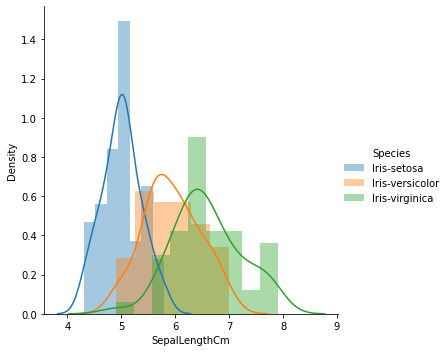

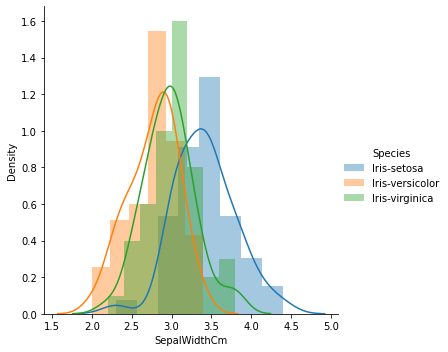

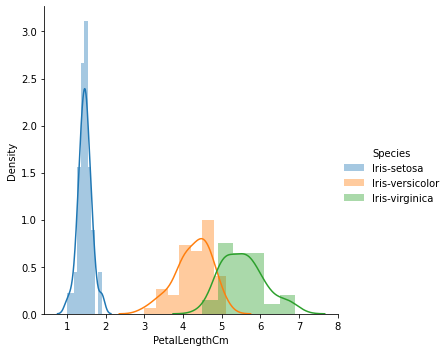

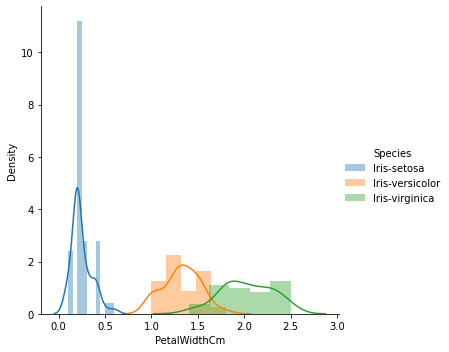

In [196]:
p1.probabilityPlotting()

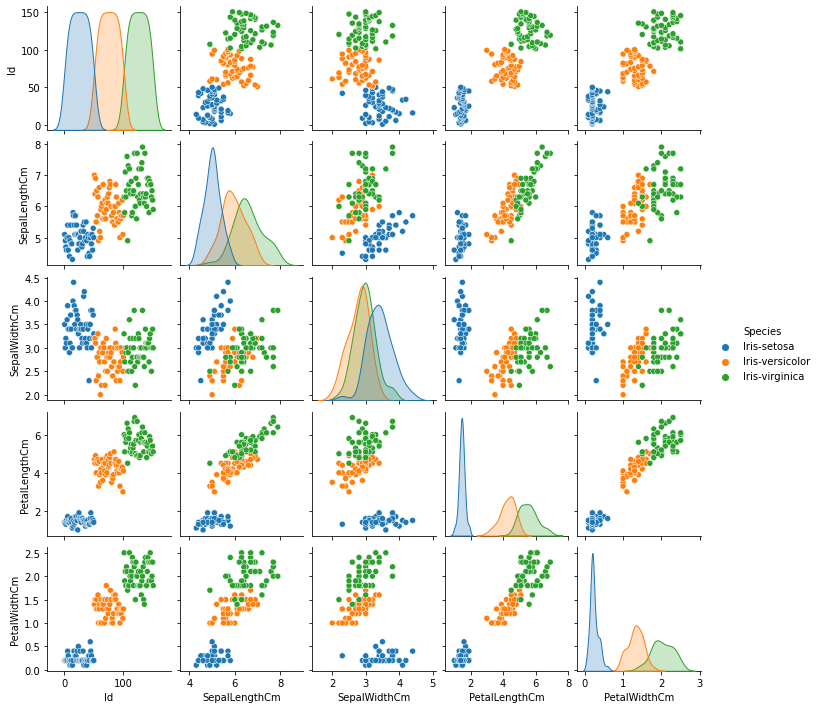

In [197]:
p1.pairplotting()

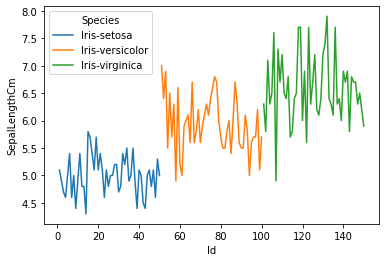

In [198]:
p1.linePlotting('Id','SepalLengthCm')

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import joblib

class MachineLearning(Iris):
  
  def __init__(self,url):
    Iris.__init__(self,url)
    choice=int(input("Choose Algorithm 1.SVM 2.KNN "))
    if choice == 1:
      self.__algorithm = 'SVM'
    else:
      self.__algorithm = 'KNN'

  def training(self):
    data=self._irisDf.values
    X= data[:,1:5]
    Y= data[:,5]
    print("Training with ",self.__algorithm, " algorithm")
    xtrain,self.__xtest,ytrain,self.__ytest=train_test_split(X,Y,test_size=0.2)
    if self.__algorithm == "KNN":
      self.__model=KNeighborsClassifier(n_neighbors=8)
      self.__model.fit(xtrain,ytrain)
      joblib.dump(self.__model , 'KNN-model')
    else:
      self.__model=SVC()
      self.__model.fit(xtrain,ytrain)
      joblib.dump(self.__model , 'SVM-model')
    self.__ypred=self.__model.predict(self.__xtest)

  def evaluateAccuracy(self):
    print(accuracy_score(self.__ytest,self.__ypred))

  def getClassificationReport(self):
    print(classification_report(self.__ytest, self.__ypred))

  def showConfusionMatrix(self):
    print(confusion_matrix(self.__ytest,self.__ypred))

  def classifyRandomInput(self):
    sepalLength=input("Enter sepal length in cm: ")
    sepalWidth=input("Enter sepal width in cm: ")
    petalLength=input("Enter petal length in cm: ")
    petalWidth=input("Enter petal width in cm: ")
    sample_data = [sepalLength,sepalWidth,petalLength,petalWidth]
    try:
      clean_data = [float(i) for i in sample_data]
      model = 'KNN-model' if self.__algorithm == 'KNN' else 'SVM-model'
      m_jlib = joblib.load(model)
      for item in clean_data:
        if not type(item) is float:
          raise TypeError("Only float are allowed") 
      output=m_jlib.predict([clean_data])
      print(output)
    except:
      print("Something went wrong when converting numbers to float")
    
    

MachineLearning is a derived class inherited from base class Iris. Any object of MachineLearning class can call functions of Iris class.
When an object of MahineLearning class is created, it should load data as well as ask for the algorithm using which model should be trained. This is handled by constructor of MachineLearning class.

algorithm,model,ytest,xtest,ypred variables have private access specifier.

training() function performs training of data which is provided during creating object of machineLearning class based on decided algorithm. model is saved using joblib library for future use.

evaluateAccuracy() function displays accuracy, the percentage of correct predictions for the test data.

getClassificationReport() returns the classification report visualizer that displays the precision, recall, F1, and support scores for the model.

showConfusionMatrix() returns Confusion matrices that provides direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

classifyRandomInput() classifies given input based on algorithm decided during creating an object and model saved using joblib after training. Prediction operation is wrapped in try-except to handle errors generated through invalid random input.


In [200]:
m1=MachineLearning(irisUrl)

Choose Algorithm 1.SVM 2.KNN 1


In [201]:
m1.training()
m1.evaluateAccuracy()

Training with  SVM  algorithm
0.9666666666666667


In [202]:
m1.getClassificationReport()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [203]:
m1.showConfusionMatrix()

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]


In [204]:
m1.classifyRandomInput()

Enter sepal length in cm: 2
Enter sepal width in cm: 3
Enter petal length in cm: 1
Enter petal width in cm: 3
['Iris-setosa']


In [205]:
m2=MachineLearning(irisUrl)

Choose Algorithm 1.SVM 2.KNN 2


In [207]:
m2.training()
m2.evaluateAccuracy()

Training with  KNN  algorithm
0.9666666666666667


In [208]:
m2.getClassificationReport()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [209]:
m2.showConfusionMatrix()

[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]


In [210]:
m2.classifyRandomInput()

Enter sepal length in cm: 3
Enter sepal width in cm: 3,4
Enter petal length in cm: 2
Enter petal width in cm: 5
Something went wrong when converting numbers to float
